# Command line example

In [1]:
! python k_means.py --data_path customer.csv --max_iterations 200 --num_clusters 25 --encode_data "yes"

2023-08-22 23:40:08 Bens-MBP k_means[46182] INFO Generating 25 random centroids
2023-08-22 23:40:08 Bens-MBP k_means[46182] INFO 
Begin training algorithm with:
Number of clusters : 25
Max iterations     : 200
  6%|██▌                                       | 12/200 [00:16<04:20,  1.39s/it]
2023-08-22 23:40:25 Bens-MBP k_means[46182] INFO Algorithm terminated after 13 iterations.
2023-08-22 23:40:25 Bens-MBP k_means[46182] INFO MSE: 8,352.36
2023-08-22 23:40:25 Bens-MBP k_means[46182] INFO Saving weights to /Users/ben/Desktop/ml_algorithms/k_means_clustering/clusters.json


# Code example

In [7]:
from k_means_clustering import K_means

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
wcss = []
for num_clusters in range(1,15):
    k_means = K_means(
        num_clusters=num_clusters,
        data=pd.read_csv("encoded_customer.csv"),
        max_iterations=2_000,
        relative_tolerance=0.05,
    )
    wcss.append(k_means.mse)
best_clusters = np.array(wcss).argmin()
k_means = K_means(
        num_clusters=best_clusters,
        data=pd.read_csv("encoded_customer.csv"),
        max_iterations=2_000,
        relative_tolerance=0.05,
    )

2023-08-22 23:55:03 Bens-MBP k_means[46169] INFO Generating 1 random centroids
2023-08-22 23:55:03 Bens-MBP k_means[46169] INFO 
Begin training algorithm with:
Number of clusters : 1
Max iterations     : 2000
  0%|          | 1/2000 [00:02<1:11:01,  2.13s/it]
2023-08-22 23:55:06 Bens-MBP k_means[46169] INFO Algorithm terminated after 2 iterations.
2023-08-22 23:55:06 Bens-MBP k_means[46169] INFO MSE: 27,600.39
2023-08-22 23:55:06 Bens-MBP k_means[46169] INFO Saving weights to /Users/ben/Desktop/ml_algorithms/k_means_clustering/clusters.json
2023-08-22 23:55:06 Bens-MBP k_means[46169] INFO Generating 2 random centroids
2023-08-22 23:55:06 Bens-MBP k_means[46169] INFO 
Begin training algorithm with:
Number of clusters : 2
Max iterations     : 2000
  0%|          | 4/2000 [00:05<44:43,  1.34s/it]
2023-08-22 23:55:11 Bens-MBP k_means[46169] INFO Algorithm terminated after 5 iterations.
2023-08-22 23:55:11 Bens-MBP k_means[46169] INFO MSE: 15,758.81
2023-08-22 23:55:11 Bens-MBP k_means[4616

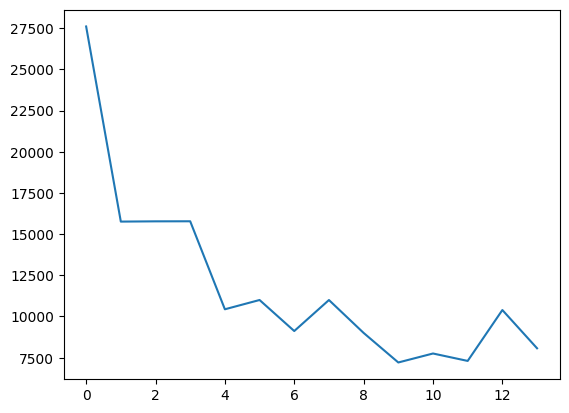

In [14]:
plt.plot(wcss)